# 1. Loading Data

In [ ]:
library(caret)

In [1]:
data <- read.csv("../data/blobs/uPab.1", header = FALSE, sep = ";")
names(data) <- c("p","nmc","nblob","nsa","ncore","ncmt","na","blob","ncopy")
data$copied <- data$ncopy > 0

In [6]:
summary(data)

                             p                  nmc             nblob        
 binary-com_binary-static     :  8894026   Min.   :  0.00   Min.   :      1  
 raphaelvigee_velib           :  7281654   1st Qu.:  3.00   1st Qu.:   1410  
 Internet2_grouper            :  4059018   Median :  9.00   Median :  10840  
 allardais_allardais.github.io:  3078049   Mean   : 28.19   Mean   : 647157  
 chenzuoli_chenzuoli.github.io:  2706388   3rd Qu.: 30.00   3rd Qu.: 115640  
 qgis_pyqgis                  :  2340082   Max.   :333.00   Max.   :8971506  
 (Other)                      :309033159                                     
      nsa               ncore              ncmt              na         
 Min.   :     0.0   Min.   :   1      Min.   :     1   Min.   :    1.0  
 1st Qu.:     0.0   1st Qu.:   1      1st Qu.:    29   1st Qu.:    1.0  
 Median :     0.0   Median :   1      Median :   164   Median :    2.0  
 Mean   :   535.5   Mean   :  49      Mean   : 22366   Mean   :  302.5  
 3rd Qu.:  

In [4]:
data$lnmc <- log(data$nmc + 1)
data$lnblob <- log(data$nblob + 1)
data$lnsa <- log(data$nsa + 1)
data$lncore <- log(data$ncore + 1)
data$lncmt <- log(data$ncmt + 1)
data$lna <- log(data$na + 1)
data$lncopy <- log(data$ncopy + 1)
nas <- which(is.na(data$ncore) | is.na(data$na))
data_c <- data[-nas,c("p","lnmc","lnblob","lnsa","lncore","lncmt","lna","copied","lncopy")]

In [7]:
summary(data_c)

                             p                  lnmc           lnblob       
 binary-com_binary-static     :  8894026   Min.   :0.000   Min.   : 0.6931  
 raphaelvigee_velib           :  7281654   1st Qu.:1.386   1st Qu.: 7.2442  
 Internet2_grouper            :  4059018   Median :2.303   Median : 9.2789  
 allardais_allardais.github.io:  3078049   Mean   :2.436   Mean   : 9.5938  
 chenzuoli_chenzuoli.github.io:  2706388   3rd Qu.:3.434   3rd Qu.:11.6236  
 qgis_pyqgis                  :  2340082   Max.   :5.811   Max.   :16.0096  
 (Other)                      :306507012                                    
      lnsa            lncore           lncmt              lna        
 Min.   : 0.000   Min.   :0.6931   Min.   : 0.6931   Min.   :0.6931  
 1st Qu.: 0.000   1st Qu.:0.6931   1st Qu.: 3.4340   1st Qu.:0.6931  
 Median : 0.000   Median :0.6931   Median : 5.1180   Median :1.0986  
 Mean   : 1.379   Mean   :1.2985   Mean   : 5.6442   Mean   :1.9557  
 3rd Qu.: 1.792   3rd Qu.:1.3863  

Test data

In [10]:
data_t <- read.csv("../data/blobs/uPab_test.1", header = FALSE, sep = ";")
names(data_t) <- c("p","nmc","nblob","nsa","ncore","ncmt","na","blob","ncopy")
data_t$copied <- data_t$ncopy > 0
data_t$lnmc <- log(data_t$nmc + 1)
data_t$lnblob <- log(data_t$nblob + 1)
data_t$lnsa <- log(data_t$nsa + 1)
data_t$lncore <- log(data_t$ncore + 1)
data_t$lncmt <- log(data_t$ncmt + 1)
data_t$lna <- log(data_t$na + 1)
data_t$lncopy <- log(data_t$ncopy + 1)
nas_t <- which(is.na(data_t$ncore) | is.na(data_t$na))
data_tc <- data_t[-nas_t,c("p","lnmc","lnblob","lnsa","lncore","lncmt","lna","copied","lncopy")]

# 2. Correlations

In [7]:
pred_n <- c(2:7)

In [10]:
cor(data_c[,pred_n],method="spearman")

,lnmc,lnblob,lnsa,lncore,lncmt,lna
lnmc,1.0000000,0.4988307,0.6247639,0.4766805,0.8391714,0.6755552
lnblob,0.4988307,1.0000000,0.3324898,0.2864866,0.5823991,0.3699725
lnsa,0.6247639,0.3324898,1.0000000,0.4546300,0.5374578,0.5957879
lncore,0.4766805,0.2864866,0.4546300,1.0000000,0.5276148,0.8065323
lncmt,0.8391714,0.5823991,0.5374578,0.5276148,1.0000000,0.6962915
lna,0.6755552,0.3699725,0.5957879,0.8065323,0.6962915,1.0000000


Standard deviations (1, .., p=6):
[1] 2.0671197 0.9052983 0.6570193 0.5420740 0.3771633 0.1991996

Rotation (n x k) = (6 x 6):
             PC1        PC2         PC3         PC4        PC5         PC6
lnmc   0.4156489  0.1771471 -0.65582353  0.06964432 -0.5812361  0.15187048
lnblob 0.3124790  0.7358975  0.52186259 -0.24111871 -0.1736090 -0.01388785
lnsa   0.4110417 -0.3073638 -0.09229584 -0.79711475  0.2530869  0.16914120
lncore 0.4110622 -0.3995671  0.45576540  0.37959455 -0.1545103  0.54377053
lncmt  0.4297043  0.2877100 -0.24583361  0.37746971  0.7269027  0.03566801
lna    0.4549941 -0.3002838  0.14449963  0.12265442 -0.1253418 -0.80695424


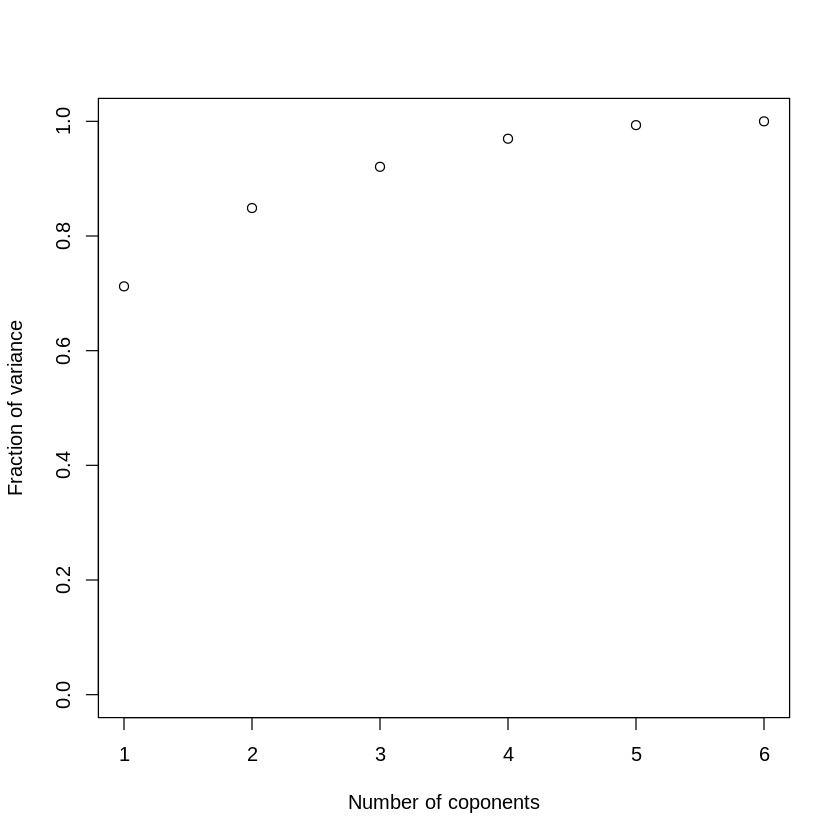

In [22]:
pca <- prcomp(data_c[,pred_n], retx=F, scale=T)
print(pca)
var <- sum(pca$sdev^2)
cumVar <- cumsum(pca$sdev^2)
plot(1:6,cumVar/var,ylim=c(0,1),xlab="Number of coponents",ylab="Fraction of variance")

In [23]:
n <- 0
varPer <- 0.9
for (i in c(1:length(pca$sdev))) {
    if(cumVar[i] > var*varPer) {
        n <- i
        break
    }
}
res <- pca$rotation[,1:n]
resAbs <- res
resAbs[res<0] <- -res[res<0]
for (i in 1:n)
  print(t(res[resAbs[,i]>.3,i,drop=FALSE]));

         lnmc   lnblob      lnsa    lncore     lncmt       lna
PC1 0.4156489 0.312479 0.4110417 0.4110622 0.4297043 0.4549941
       lnblob       lnsa     lncore        lna
PC2 0.7358975 -0.3073638 -0.3995671 -0.3002838
          lnmc    lnblob    lncore
PC3 -0.6558235 0.5218626 0.4557654


In [8]:
vnam <- names(data_c[,pred_n])
len <- dim(data_c[,pred_n])[2]
res <- vector(mode="list", length=len)
for (i in 1:len){
  fmla <- as.formula(paste(vnam[i],paste(vnam[-i],collapse="+"),sep="~"));
  res[[i]] <- lm(fmla,data=data_c[,pred_n]);
}

In [9]:
for (i in 1:len) {
    print(c(vnam[i],"-> ",summary(res[[i]])$adj.r.squared),quote=FALSE)
}

[1] lnmc              ->                0.752949484183488
[1] lnblob           ->               0.42166732260956
[1] lnsa              ->                0.714948919288634
[1] lncore            ->                0.886690972362135
[1] lncmt             ->                0.778545981396533
[1] lna               ->                0.940401473580882


# 3. Model

### 3.1. ~ lnmc + lnblob + lnsa + lncmt

In [32]:
lm <- lm(lncopy~lnmc+lnblob+lnsa+lncmt, data=data_c)
summary(lm)


Call:
lm(formula = lncopy ~ lnmc + lnblob + lnsa + lncmt, data = data_c)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.2972 -0.1178 -0.0879 -0.0581 12.6193 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.543e-01  7.320e-05  2108.5   <2e-16 ***
lnmc        -5.165e-03  3.002e-05  -172.1   <2e-16 ***
lnblob       3.542e-03  9.012e-06   393.0   <2e-16 ***
lnsa         2.059e-02  1.281e-05  1606.8   <2e-16 ***
lncmt       -1.963e-02  1.403e-05 -1399.0   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3925 on 334866224 degrees of freedom
Multiple R-squared:  0.01369,	Adjusted R-squared:  0.01369 
F-statistic: 1.162e+06 on 4 and 334866224 DF,  p-value: < 2.2e-16


In [17]:
glm <- glm(copied~lnmc+lnblob+lnsa+lncmt,data=data_c,family=binomial)
summary(glm)


Call:
glm(formula = copied ~ lnmc + lnblob + lnsa + lncmt, family = binomial, 
    data = data_c)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0398  -0.4541  -0.3812  -0.3117   2.9735  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.638e+00  6.853e-04 -2390.6   <2e-16 ***
lnmc        -6.928e-02  3.294e-04  -210.3   <2e-16 ***
lnblob       2.771e-02  8.227e-05   336.8   <2e-16 ***
lnsa         2.043e-01  1.254e-04  1629.4   <2e-16 ***
lncmt       -2.251e-01  1.527e-04 -1473.9   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 189939186  on 334866228  degrees of freedom
Residual deviance: 183585092  on 334866224  degrees of freedom
AIC: 183585102

Number of Fisher Scoring iterations: 5


In [18]:
glm_p <- predict(glm,newdata=data_tc,type="response") > 0.5
confusionMatrix(data=factor(glm_p), reference = factor(data_tc[,"copied"]))

Warning message in confusionMatrix.default(data = factor(glm_p), reference = factor(data_tc[, :
"Levels are not in the same order for reference and data. Refactoring data to match."


Confusion Matrix and Statistics

          Reference
Prediction    FALSE     TRUE
     FALSE 17610729  2033855
     TRUE         0        0
                                          
               Accuracy : 0.8965          
                 95% CI : (0.8963, 0.8966)
    No Information Rate : 0.8965          
    P-Value [Acc > NIR] : 0.5002          
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 1.0000          
            Specificity : 0.0000          
         Pos Pred Value : 0.8965          
         Neg Pred Value :    NaN          
             Prevalence : 0.8965          
         Detection Rate : 0.8965          
   Detection Prevalence : 1.0000          
      Balanced Accuracy : 0.5000          
                                          
       'Positive' Class : FALSE           


### 3.2. ~ lnsa

In [8]:
lm2 <- lm(lncopy~lnsa, data=data_c)
summary(lm2)


Call:
lm(formula = lncopy ~ lnsa, data = data_c)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.1359 -0.0934 -0.0877 -0.0877 12.6264 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 8.769e-02  2.515e-05  3485.9   <2e-16 ***
lnsa        4.104e-03  9.359e-06   438.5   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3951 on 334866227 degrees of freedom
Multiple R-squared:  0.000574,	Adjusted R-squared:  0.000574 
F-statistic: 1.923e+05 on 1 and 334866227 DF,  p-value: < 2.2e-16


In [9]:
glm2 <- glm(copied~lnsa,data=data_c,family=binomial)
summary(glm2)


Call:
glm(formula = copied ~ lnsa, family = binomial, data = data_c)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.4138  -0.4138  -0.4138  -0.4134   2.2390  

Coefficients:
              Estimate Std. Error    z value Pr(>|z|)    
(Intercept) -2.415e+00  2.320e-04 -10408.618  < 2e-16 ***
lnsa        -5.732e-04  8.643e-05     -6.632 3.31e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 189939186  on 334866228  degrees of freedom
Residual deviance: 189939142  on 334866227  degrees of freedom
AIC: 189939146

Number of Fisher Scoring iterations: 5


In [15]:
glm2_p <- predict(glm2,newdata=data_tc,type="response") > 0.5
confusionMatrix(data=factor(glm2_p), reference = factor(data_tc[,"copied"]))

Loading required package: lattice

Loading required package: ggplot2

Warning message in confusionMatrix.default(data = factor(glm2_p), reference = factor(data_tc[, :
"Levels are not in the same order for reference and data. Refactoring data to match."


Confusion Matrix and Statistics

          Reference
Prediction    FALSE     TRUE
     FALSE 17610729  2033855
     TRUE         0        0
                                          
               Accuracy : 0.8965          
                 95% CI : (0.8963, 0.8966)
    No Information Rate : 0.8965          
    P-Value [Acc > NIR] : 0.5002          
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 1.0000          
            Specificity : 0.0000          
         Pos Pred Value : 0.8965          
         Neg Pred Value :    NaN          
             Prevalence : 0.8965          
         Detection Rate : 0.8965          
   Detection Prevalence : 1.0000          
      Balanced Accuracy : 0.5000          
                                          
       'Positive' Class : FALSE           
